In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyproj
import folium
from folium.plugins import MarkerCluster

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./src/서울_강남구.csv')

### 결측치 확인

In [3]:
print(df.shape)
df.head()

(27021, 3)


,name,score,review
0,명동칼국수샤브샤브 강남대로점,1,설거지좀 제대로 해주세요. 칼국수 그릇 겉에 국물 마른 자국이 항상 있네요
1,명동칼국수샤브샤브 강남대로점,4,맛있음. 구성좋고 가격도 합리적. 친절함.
2,명동칼국수샤브샤브 강남대로점,5,"가성비 좋고, 죽이 맛있어요. 칼국수는 쏘쏘"
3,명동칼국수샤브샤브 강남대로점,5,깔끔존맛이에요
4,명동칼국수샤브샤브 강남대로점,3,NaN


In [4]:
def check_null(df):    
    total_cnt = 0
    for i in df.columns:
        cnt = sum(df[i].isnull())
        total_cnt += cnt
        if cnt:
            print(f'{i}열에 결측치{cnt}개')
        else:
            print(f'{i}열에 결측치 없음')
    if total_cnt == 0:
        print('모든 열에 결측치 없음')
    else:
        print(f'총 결측치 {total_cnt}개')

In [5]:
check_null(df) # 결측치는 리뷰에만 존재함

name열에 결측치 없음
score열에 결측치 없음
review열에 결측치4672개
총 결측치 4672개


### 리뷰 수 분석

In [6]:
print('전체 음식점 수:',df['name'].nunique())

전체 음식점 수: 2840


In [7]:
# 가게별 리뷰 수
df['name'].value_counts()

농민백암순대 본점       75
농민백암왕순대         75
카페캠프통           50
영동원삼겹살          50
보트르메종           50
                ..
국수마을             1
생생돈까스 강남점        1
왕빈자삼파전 논현점       1
바탄(BAR TANN)     1
원조마포소금구이 강남점     1
Name: name, Length: 2840, dtype: int64

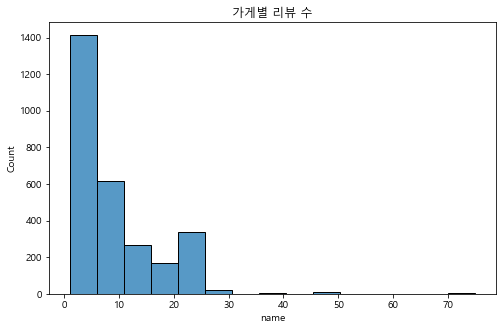

In [8]:
# 가게별 리뷰 수 히스토그램
plt.figure(figsize=(8,5))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.histplot(df['name'].value_counts(),bins=15)
plt.title('가게별 리뷰 수')
plt.show()

In [9]:
# 리뷰 수 평균
print('가게별 리뷰 수 평균:',df.value_counts(subset='name').mean())
a = df.value_counts(subset='name')
print('평균보다 리뷰가 많은 가게:',len(a[a > df['name'].value_counts().mean()])) 
print('평균보다 리뷰가 적은 가게:',len(a[a < df['name'].value_counts().mean()])) 

가게별 리뷰 수 평균: 9.51443661971831
평균보다 리뷰가 많은 가게: 1407
평균보다 리뷰가 적은 가게: 1433


### 별점 수 분석

In [10]:
# 별점 수
df.value_counts(subset='score')

score
5    12603
1     5688
4     4317
3     2813
2     1600
dtype: int64

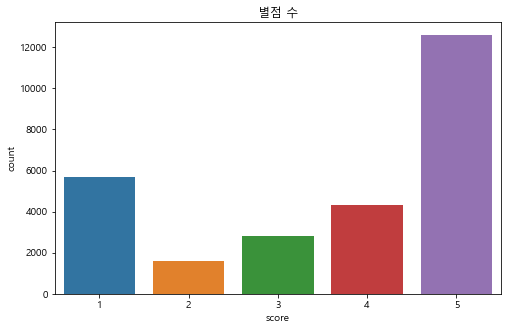

In [11]:
# 별점 수 막대그래프
plt.figure(figsize=(8,5))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.countplot(df['score'])
plt.title('별점 수')
plt.show()
# 리뷰 별점은 대부분 5점이나 1점을 주기위해서 많이 작성한다. 그리고 긍정적인 5점을 주기 위한 경우가 더 많다

In [12]:
print('전체 별점 평균:',df['score'].mean())

전체 별점 평균: 3.6123755597498244


### 리뷰 길이 분석

In [13]:
# 리뷰 결측치 제거
df2 = df.dropna()
df2 = df2.reset_index(drop=True)
print(df2.shape)
df2.head()

(22349, 3)


,name,score,review
0,명동칼국수샤브샤브 강남대로점,1,설거지좀 제대로 해주세요. 칼국수 그릇 겉에 국물 마른 자국이 항상 있네요
1,명동칼국수샤브샤브 강남대로점,4,맛있음. 구성좋고 가격도 합리적. 친절함.
2,명동칼국수샤브샤브 강남대로점,5,"가성비 좋고, 죽이 맛있어요. 칼국수는 쏘쏘"
3,명동칼국수샤브샤브 강남대로점,5,깔끔존맛이에요
4,세븐브릭스키친,1,너무 불친절해서 다시는 가고 싶지 않아요.


In [14]:
review_len = [len(df2['review'][i]) for i in range(df2.shape[0])]
df2.insert(3,'review_len',review_len)

In [15]:
df2.head()

,name,score,review,review_len
0,명동칼국수샤브샤브 강남대로점,1,설거지좀 제대로 해주세요. 칼국수 그릇 겉에 국물 마른 자국이 항상 있네요,42
1,명동칼국수샤브샤브 강남대로점,4,맛있음. 구성좋고 가격도 합리적. 친절함.,25
2,명동칼국수샤브샤브 강남대로점,5,"가성비 좋고, 죽이 맛있어요. 칼국수는 쏘쏘",24
3,명동칼국수샤브샤브 강남대로점,5,깔끔존맛이에요,7
4,세븐브릭스키친,1,너무 불친절해서 다시는 가고 싶지 않아요.,23


In [16]:
print('평균 리뷰 글자:',df2['review_len'].mean())
print('평균보다 리뷰 글자 수가 많은 리뷰:',len(df2[df2['review_len'] > df2['review_len'].mean()])) 
print('평균보다 리뷰 글자 수가 적은 리뷰:',len(df2[df2['review_len'] < df2['review_len'].mean()])) 

평균 리뷰 글자: 59.53957671484183
평균보다 리뷰 글자 수가 많은 리뷰: 7999
평균보다 리뷰 글자 수가 적은 리뷰: 14350


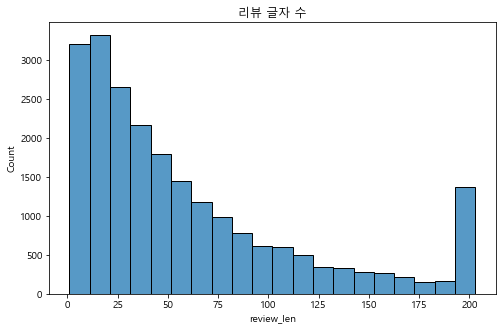

In [17]:
plt.figure(figsize=(8,5))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.histplot(df2['review_len'],bins=20)
plt.title('리뷰 글자 수')
plt.show()
# 사람들은 리뷰를 길게 작성하지 않는다 (가장 길게 작성한 리뷰쪽이 많은 이유는 모르겠다)

In [18]:
for i in range(1,6):
    print(f'별점{i}개 평균 리뷰 글자 수:',df2[df2['score'] == i]['review_len'].mean())
# 대체적으로 별점이 낮으면 리뷰 글자 수가 많다(기분 나쁘면 할 말이 많은듯)

별점1개 평균 리뷰 글자 수: 80.65060240963855
별점2개 평균 리뷰 글자 수: 74.31485429992892
별점3개 평균 리뷰 글자 수: 59.52982954545455
별점4개 평균 리뷰 글자 수: 50.819963257807714
별점5개 평균 리뷰 글자 수: 49.60445089501693


### 위도 경도 데이터 추가

In [19]:
df3 = pd.read_csv('./seoul_food_id_kakao.csv')
df3 = df3[df3['구'] == '강남구']
df3 = df3[['사업장명(카카오)','좌표정보(X)', '좌표정보(Y)']]
df3 = df3.reset_index(drop=True)
df3.head()

,사업장명(카카오),좌표정보(X),좌표정보(Y)
0,카페디퍼,204776.548264,444677.642985
1,숯칼도산숯닭갈비,202545.473911,446358.225573
2,롯데시네마 도곡,204098.596031,442807.317225
3,이소젠네타,201713.280105,446129.893616
4,로지,203261.244008,446841.847957


In [20]:
x = []
for i in range(df2.shape[0]):
    try:
        x.append(float(df3[df3['사업장명(카카오)'] == df2['name'][i]]['좌표정보(X)'].iloc[0]))
    except:
        x.append(0)
print('error 갯수:',x.count(0))

error 갯수: 5


In [21]:
y = []
for i in range(df2.shape[0]):
    try:
        y.append(float(df3[df3['사업장명(카카오)'] == df2['name'][i]]['좌표정보(Y)'].iloc[0]))
    except:
        y.append(0)
print('error 갯수:',y.count(0))

error 갯수: 5


In [22]:
xy = np.array([[x[i], y[i]] for i in range(len(x))])
xy

array([[203705.02213402, 444361.30601261],
       [203705.02213402, 444361.30601261],
       [203705.02213402, 444361.30601261],
       ...,
       [202480.89661316, 445792.73976125],
       [205340.63112157, 445354.57111745],
       [201782.10122745, 446748.06718389]])

In [23]:
def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5179
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

# 좌표계 정보 설정
p1_type = "epsg:2097"
p2_type = "epsg:4326"

# project_array() 함수 실행
result = project_array(xy, p1_type, p2_type)
result

array([[127.03979893,  37.50145648],
       [127.03979893,  37.50145648],
       [127.03979893,  37.50145648],
       ...,
       [127.02595989,  37.51435768],
       [127.0583033 ,  37.51039788],
       [127.01805802,  37.5229667 ]])

In [24]:
df2['경도'] = result[:, 0]
df2['위도'] = result[:, 1]
df2

,name,score,review,review_len,경도,위도
0,명동칼국수샤브샤브 강남대로점,1,설거지좀 제대로 해주세요. 칼국수 그릇 겉에 국물 마른 자국이 항상 있네요,42,127.039799,37.501456
1,명동칼국수샤브샤브 강남대로점,4,맛있음. 구성좋고 가격도 합리적. 친절함.,25,127.039799,37.501456
2,명동칼국수샤브샤브 강남대로점,5,"가성비 좋고, 죽이 맛있어요. 칼국수는 쏘쏘",24,127.039799,37.501456
3,명동칼국수샤브샤브 강남대로점,5,깔끔존맛이에요,7,127.039799,37.501456
4,세븐브릭스키친,1,너무 불친절해서 다시는 가고 싶지 않아요.,23,127.036610,37.486880
...,...,...,...,...,...,...
22344,류몽민,5,닭좋아하는 저희 가족 완전 폭식하고 왔어요 넘넘 맛있어요 ㅎㅎㅎ 매운거 못먹겠다는 ...,68,127.025960,37.514358
22345,류몽민,5,닭갈비에 막국수 조합 짱이에요 ㅜㅜ 짱 맛있음.... 다음에 또 올게요 가족들 다 ...,58,127.025960,37.514358
22346,류몽민,5,닭갈비에 밥볶아먹는거 너무좋아요 >< 집에서 해먹음 왜 이맛이 안나는지ㅠㅠ 또 찾아...,70,127.025960,37.514358
22347,크랩52,5,와이프가 좋아합니다. 와이프가 너무 좋아해서 자주 오고 싶은데 예약이 너무 어려움....,51,127.058303,37.510398
